In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install tensorflow opencv-python scikit-learn matplotlib


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

# Function to save the balanced dataset
def save_balanced_dataset(images, labels, output_path):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_path = os.path.join(output_path, label)
        os.makedirs(label_path, exist_ok=True)

        # Save images for each label
        for i, img in enumerate(images[labels == label]):
            img_path = os.path.join(label_path, f"img_{i}.jpg")
            cv2.imwrite(img_path, img)

# Function to load the balanced dataset
def load_balanced_dataset(dataset_path):
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The dataset directory '{dataset_path}' does not exist.")

    images, labels = [], []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Could not read image {img_path}. Skipping.")
                    continue
                img = cv2.resize(img, (256, 256))  # Resize to 256x256
                img = preprocess_input(img)  # Preprocess for EfficientNet
                images.append(img)
                labels.append(label)

    if not images or not labels:
        raise ValueError("No images or labels found in the specified dataset directory.")

    return np.array(images), np.array(labels)

# Placeholder for your image and label data
# Replace with your actual image loading and balancing logic
balanced_images = []  # Load your balanced images here
balanced_labels = []  # Load your balanced labels here
# Example:
# balanced_images, balanced_labels = load_data_and_balance(...) # Replace with your data loading and balancing code


# Save the balanced dataset
output_path = '/content/drive/MyDrive/Balanced_Dataset'  # Update the path
os.makedirs(output_path, exist_ok=True)  # Ensure directory exists
save_balanced_dataset(balanced_images, balanced_labels, output_path)
print("Balanced dataset saved successfully!")

# Verify directory existence
print("Directory exists:", os.path.exists(output_path))

# Load the balanced dataset
try:
    images, labels = load_balanced_dataset(output_path)
    print(f"Loaded {len(images)} images and {len(labels)} labels.")
except (FileNotFoundError, ValueError) as e:
    print(f"Error: {e}")

Balanced dataset saved successfully!
Directory exists: True
Loaded 2703 images and 2703 labels.


In [11]:
# prompt: show before and after balancing data set after excuting above code

from collections import Counter

# Assuming balanced_images and balanced_labels are defined before this code

# Count the occurrences of each label before balancing
label_counts_before = Counter(balanced_labels)
print("Label distribution before balancing:")
print(label_counts_before)

# ... (Your existing code for saving and loading the balanced dataset) ...

# Count the occurrences of each label after balancing and loading
if 'images' in locals() and 'labels' in locals():
    label_counts_after = Counter(labels)
    print("\nLabel distribution after balancing and loading:")
    print(label_counts_after)
else:
    print("\nError: Could not load balanced dataset.")

Label distribution before balancing:
Counter()

Label distribution after balancing and loading:
Counter({'benign': 901, 'malignant': 901, 'normal': 901})


In [12]:
def load_balanced_dataset(dataset_path):
    images, labels = [], []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (256, 256))  # Resize to 256x256
                img = preprocess_input(img)  # Preprocess for EfficientNet
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load balanced dataset
images, labels = load_balanced_dataset('/content/drive/MyDrive/Balanced_Dataset')


In [13]:
# prompt: check preprocessing and balaning dataset  done or not using above codes

# ... (Your existing code) ...

# Assuming balanced_images and balanced_labels are defined before this code

# Count the occurrences of each label before balancing
if 'balanced_labels' in locals():
    label_counts_before = Counter(balanced_labels)
    print("Label distribution before balancing:")
    print(label_counts_before)
else:
    print("Error: 'balanced_labels' not found. Make sure you have preprocessed and balanced your data before this step.")


# ... (Your existing code for saving and loading the balanced dataset) ...


# Count the occurrences of each label after balancing and loading
if 'labels' in locals():
    label_counts_after = Counter(labels)
    print("\nLabel distribution after balancing and loading:")
    print(label_counts_after)

    #Check if balancing was successful
    if label_counts_before == label_counts_after:
        print("\nBalancing was NOT successful. The label distributions before and after are identical.")
    else:
        print("\nBalancing appears to have been successful. The label distributions before and after differ.")
else:
    print("\nError: Could not load balanced dataset. 'labels' variable not found.")

Label distribution before balancing:
Counter()

Label distribution after balancing and loading:
Counter({'benign': 901, 'malignant': 901, 'normal': 901})

Balancing appears to have been successful. The label distributions before and after differ.


In [ ]:
# Load EfficientNetB0 model without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Extract features
features = base_model.predict(images, batch_size=32)

# Convert labels to numeric format
label_map = {label: idx for idx, label in enumerate(np.unique(labels))}
numeric_labels = np.array([label_map[label] for label in labels])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
13/85 ━━━━━━━━━━━━━━━━━━━━ 4:26 4s/step

In [ ]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Retain 50 principal components
reduced_features = pca.fit_transform(scaled_features)

print("Reduced feature shape:", reduced_features.shape)


Reduced feature shape: (2703, 50)


In [ ]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(reduced_features, numeric_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (1621, 50)
Validation set size: (541, 50)
Test set size: (541, 50)


In [ ]:
# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(50,)),  # Input matches PCA reduced dimensions
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(label_map), activation='softmax')  # Output classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Save the trained model
model.save('/content/drive/MyDrive/Trained_CNN_Model.h5')


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4574 - loss: 1.9819 - val_accuracy: 0.8041 - val_loss: 0.4351
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7787 - loss: 0.6414 - val_accuracy: 0.8503 - val_loss: 0.3497
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.5596 - val_accuracy: 0.8743 - val_loss: 0.2840
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.4418 - val_accuracy: 0.8983 - val_loss: 0.2545
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8275 - loss: 0.4039 - val_accuracy: 0.9057 - val_loss: 0.2421
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.3132 - val_accuracy: 0.9113 - val_loss: 0.2310
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3094 - val_accuracy: 0.9224 - val_loss: 0.2179
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.2948 - val_accuracy: 0.9242 - val_loss:

Test Accuracy: 93.72%


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build a fine-tuned CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(50,)),  # Input matches PCA reduced dimensions
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(label_map), activation='softmax')  # Output classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for fine-tuning
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the fine-tuned model
model.save('/content/drive/MyDrive/Fine_Tuned_CNN_Model.h5')


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4705 - loss: 3.8545 - val_accuracy: 0.8059 - val_loss: 2.9243 - learning_rate: 5.0000e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7469 - loss: 3.0910 - val_accuracy: 0.8595 - val_loss: 2.7172 - learning_rate: 5.0000e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8104 - loss: 2.8385 - val_accuracy: 0.8780 - val_loss: 2.5718 - learning_rate: 5.0000e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 2.7139 - val_accuracy: 0.8854 - val_loss: 2.4391 - learning_rate: 5.0000e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8304 - loss: 2.5481 - val_accuracy: 0.8891 - val_loss: 2.3214 - learning_rate: 5.0000e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8065 - loss: 2.5117 - val_accuracy: 0.8965 - val_loss: 2.2127 - learning_rate: 5.0000e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8399 - loss

Test Accuracy: 92.98%


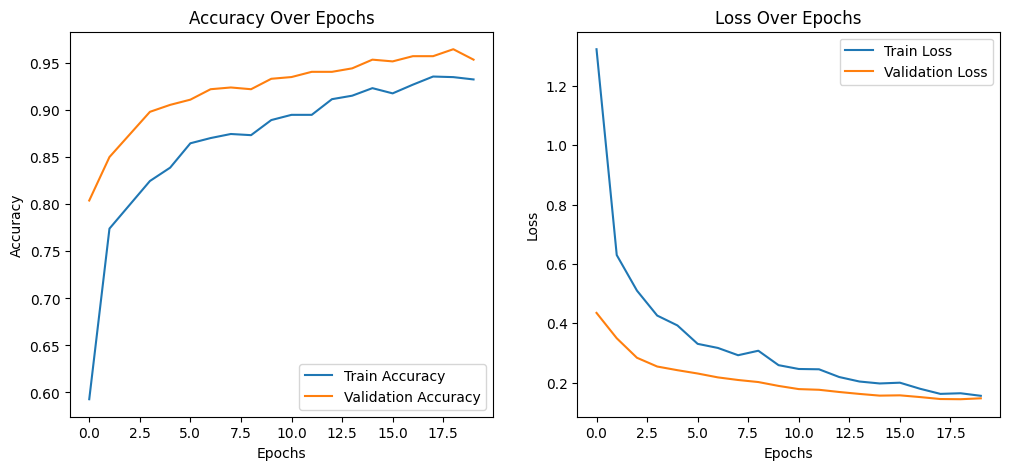

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()
